In [1]:


from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',  #5000 default
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1fc41787-e63f-4271-be30-4b45598b37db',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-08T11:57:46.840Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 10301}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10327, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd

#sd = pd.json_normalize(data)
#sd.keys()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',10)

In [4]:
import pandas as pd

#sd = pd.json_normalize(data)
#sd.keys()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',10)
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10327,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.942352e+07,1.942352e+07,False,NaN,1,NaN,NaN,NaN,2023-07-08T11:56:00.000Z,30203.613137,1.024609e+10,-45.1562,-0.121770,0.305140,-1.093539,14.194220,9.074609,8.098275,5.866606e+11,49.8869,6.342759e+11,NaN,2023-07-08T11:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 11:57:01.932453
1,1027,Ethereum,ETH,ethereum,7098,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202092e+08,1.202092e+08,True,NaN,2,NaN,NaN,NaN,2023-07-08T11:56:00.000Z,1859.130921,5.303303e+09,-38.4996,-0.236157,-0.083467,-3.337234,0.780442,0.634252,1.048937,2.234846e+11,19.0045,2.234846e+11,NaN,2023-07-08T11:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 11:57:01.932453
2,825,Tether,USDT,tether,56537,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336072e+10,8.573098e+10,True,NaN,3,NaN,NaN,NaN,2023-07-08T11:56:00.000Z,1.000095,1.693917e+10,-39.4971,-0.022551,-0.014376,-0.018655,0.017829,-0.059063,-0.040694,8.336861e+10,7.0894,8.573910e+10,NaN,2023-07-08T11:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-08 11:57:01.932453
3,1839,BNB,BNB,bnb,1489,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558501e+08,1.558501e+08,False,NaN,4,NaN,NaN,NaN,2023-07-08T11:56:00.000Z,236.337808,3.629275e+08,-30.7705,-0.279971,1.069893,-2.924009,-10.974453,-24.959596,-23.898612,3.683326e+10,3.1322,3.683326e+10,NaN,2023-07-08T11:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 11:57:01.932453
4,3408,USD Coin,USDC,usd-coin,13235,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.750487e+10,2.750487e+10,False,NaN,5,NaN,NaN,NaN,2023-07-08T11:56:00.000Z,1.000039,2.429860e+09,-39.8423,-0.015116,-0.006609,-0.034451,0.020179,-0.003732,0.011284,2.750594e+10,2.3393,2.750594e+10,NaN,2023-07-08T11:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-08 11:57:01.932453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,11221,BitDAO,BIT,bitdao,57,2021-08-11T00:00:00.000Z,"[dao, governance, dragonfly-capital-portfolio,...",1.000000e+10,1.843670e+09,1.000000e+10,False,NaN,46,3.000000e+09,1.311733e+09,NaN,2023-07-08T11:56:00.000Z,0.437244,1.136818e+07,-12.3894,-0.252383,-2.995348,7.162167,-9.413103,-10.276818,-15.077053,8.061345e+08,0.0686,4.372445e+09,NaN,2023-07-08T11:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0x1A4b46696b2bB4794Eb3D4c26f1c55F9170fa4C5,2023-07-08 11:57:01.932453
46,3602,Bitcoin SV,BSV,bitcoin-sv,197,2018-11-09T00:00:00.000Z,"[mineable, pow, sha-256, medium-of-exchange, s...",2.100000e+07,1.926608e+07,1.926608e+07,False,NaN,47,NaN,NaN,NaN,2023-07-08T11:56:00.000Z,41.713184,5.297418e+07,-27.7124,-1.803960,-2.464196,-16.393940,37.952558,5.300281,17.351442,8.036494e+08,0.0683,8.759769e+08,NaN,2023-07-08T11:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 11:57:01.932453
47,1765,EOS,EOS,eos,540,2017-07-01T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, sma...",NaN,1.096173e+09,1.096173e+09,True,NaN,48,1.096177e+09,7.899000e+08,NaN,2023-07-08T11:56:00.000Z,0.720595,9.942669e+07,-30.6089,-0.337087,0.504653,-7.841429,-18.71

In [6]:
def api_run():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'50',  #5000 default
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1fc41787-e63f-4271-be30-4b45598b37db',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
     
    
    pd.set_option('display.max_columns',None)
    #pd.set_option('display.max_rows',None)
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    import os
    if not os.path.exists(r'E:/a13hi/Compressed/chinkuz/jupyter_code/Coinbase_analysis/test_run_files/testapi.csv'):
        df.to_csv(r'E:/a13hi/Compressed/chinkuz/jupyter_code/Coinbase_analysis/test_run_files/testapi.csv',header = df.columns,index=False)
    else:
        df.to_csv(r'E:/a13hi/Compressed/chinkuz/jupyter_code/Coinbase_analysis/test_run_files/testapi.csv',mode='a',header = False,index=False)
    

In [7]:
import os
import time
while True:
    api_run()
    time.sleep(5)

{'status': {'timestamp': '2023-07-08T11:59:33.930Z', 'error_code': 0, 'error_message': None, 'elapsed': 7, 'credit_count': 1, 'notice': None, 'total_count': 10301}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10327, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [8]:
df2 = pd.read_csv(r'E:/a13hi/Compressed/chinkuz/jupyter_code/Coinbase_analysis/test_run_files/testapi.csv')
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10171,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.935223e+07,1.935223e+07,False,NaN,1,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,28025.631859,2.153753e+10,2.5768,-0.126431,-3.019955,-8.965763,-0.501922,14.289134,23.185675,5.423585e+11,45.7278,5.885383e+11,NaN,2023-04-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 09:40:31.449539
1,1027,Ethereum,ETH,ethereum,6749,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204165e+08,1.204165e+08,False,NaN,2,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,1919.795273,1.157189e+10,-3.8090,-0.125845,-1.989810,-9.187113,7.078141,13.146779,16.333214,2.311750e+11,19.4980,2.311750e+11,NaN,2023-04-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 09:40:31.449539
2,825,Tether,USDT,tether,51644,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.140575e+10,8.509174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,1.000063,3.603860e+10,-1.4935,0.008295,-0.040940,-0.077383,-0.143570,-0.017218,-0.021434,8.141091e+10,6.8640,8.509713e+10,NaN,2023-04-21T09:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-21 09:40:31.449539
3,1839,BNB,BNB,bnb,1273,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558647e+08,1.558647e+08,False,NaN,4,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,327.797998,8.997443e+08,27.6095,-0.642051,0.496046,-1.606322,-1.871249,3.570641,7.649639,5.109214e+10,4.3077,5.109214e+10,NaN,2023-04-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 09:40:31.449539
4,3408,USD Coin,USDC,usd-coin,11945,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.099799e+10,3.099799e+10,False,NaN,5,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,1.000023,5.519604e+09,6.7976,0.004196,-0.004778,0.020918,0.112551,-0.002620,0.006062,3.099871e+10,2.6136,3.099871e+10,NaN,2023-04-21T09:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-21 09:40:31.449539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,11221,BitDAO,BIT,bitdao,57,2021-08-11T00:00:00.000Z,"['dao', 'governance', 'dragonfly-capital-portf...",1.000000e+10,1.843670e+09,1.000000e+10,False,NaN,46,3.000000e+09,1.311654e+09,NaN,2023-07-08T11:57:00.000Z,0.437218,1.136839e+07,-12.3867,-0.267194,-2.998122,7.167973,-9.425012,-10.254590,-15.071839,8.060859e+08,0.0685,4.372181e+09,NaN,2023-07-08T11:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0x1A4b46696b2bB4794Eb3D4c26f1c55F9170fa4C5,2023-07-08 11:58:36.824172
546,3602,Bitcoin SV,BSV,bitcoin-sv,197,2018-11-09T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'medium-of-exch...",2.100000e+07,1.926608e+07,1.926608e+07,False,NaN,47,NaN,NaN,NaN,2023-07-08T11:57:00.000Z,41.720115,5.298211e+07,-27.5551,-1.677363,-2.441812,-16.355598,37.977517,5.587040,17.330202,8.037829e+08,0.0683,8.761224e+08,NaN,2023-07-08T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 11:58:36.824172
547,1765,EOS,EOS,eos,540,2017-07-01T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",NaN,1.096173e+09,1.096173e+09,True,NaN,48,1.096177e+09,7.899666e+08,NaN,2023-07-08T11:57:00.000Z,0.720656,9.943099e+07,-30.4720,-0.325102,0.516661,-7.807631,-18.707783

In [8]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [9]:
pd.set_option('display.float_format',lambda x:'%.5f' %x)


In [11]:
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10171,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19352231.00000,19352231.00000,False,NaN,1,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,28025.63186,21537527926.90617,2.57680,-0.12643,-3.01995,-8.96576,-0.50192,14.28913,23.18568,542358501656.71179,45.72780,588538269039.42004,NaN,2023-04-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 09:40:31.449539
1,1027,Ethereum,ETH,ethereum,6749,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120416479.50036,120416479.50036,False,NaN,2,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,1919.79527,11571892589.53887,-3.80900,-0.12584,-1.98981,-9.18711,7.07814,13.14678,16.33321,231174988135.19635,19.49800,231174988135.20001,NaN,2023-04-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 09:40:31.449539
2,825,Tether,USDT,tether,51644,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81405748697.86789,85091735571.74741,False,NaN,3,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,1.00006,36038598670.23762,-1.49350,0.00829,-0.04094,-0.07738,-0.14357,-0.01722,-0.02143,81410906605.57480,6.86400,85097127025.37000,NaN,2023-04-21T09:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-21 09:40:31.449539
3,1839,BNB,BNB,bnb,1273,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155864702.87401,155864702.87401,False,NaN,4,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,327.79800,899744332.52379,27.60950,-0.64205,0.49605,-1.60632,-1.87125,3.57064,7.64964,51092137583.45676,4.30770,51092137583.46000,NaN,2023-04-21T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 09:40:31.449539
4,3408,USD Coin,USDC,usd-coin,11945,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30997986073.64238,30997986073.64238,False,NaN,5,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,1.00002,5519604277.05935,6.79760,0.00420,-0.00478,0.02092,0.11255,-0.00262,0.00606,30998705726.19530,2.61360,30998705726.20000,NaN,2023-04-21T09:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-21 09:40:31.449539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6892,MultiversX,EGLD,multiversx-egld,156,2020-09-04T00:00:00.000Z,"['binance-launchpad', 'binance-labs-portfolio'...",31415926.00000,25658267.00000,25663419.00000,False,NaN,46,25658267.00000,881996894.22685,NaN,2023-07-06T12:44:00.000Z,34.37476,11848784.32475,-7.13350,-2.43003,-1.83251,1.96815,-4.94338,-13.23408,-15.77409,881996894.22685,0.07410,1079915068.36000,NaN,2023-07-06T12:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-06 12:45:10.642628
496,11221,BitDAO,BIT,bitdao,57,2021-08-11T00:00:00.000Z,"['dao', 'governance', 'dragonfly-capital-portf...",10000000000.00000,1843669839.17646,10000000000.00000,False,NaN,47,3000000000.00000,1389979113.09260,NaN,2023-07-06T12:44:00.000Z,0.46333,21463958.73983,-16.23520,-0.36378,1.63868,20.17839,-4.20474,-7.42810,-11.06861,854220855.96469,0.07170,4633263710.31000,NaN,2023-07-06T12:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x1A4b46696b2bB4794Eb3D4c26f1c55F9170fa4C5,2023-07-06 12:45:10.642628
497,3602,Bitcoin SV,BSV,bitcoin-sv,196,2018-11-09T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'medium-

In [12]:
df2.sort_values(by="circulating_supply",ascending = False)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
13,5994,Shiba Inu,SHIB,shiba-inu,507,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589544117991378.62500,589604828046074.50000,False,NaN,14,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,0.00001,219319044.69682,-14.21350,0.07356,-3.44742,-5.87940,-2.39006,-21.85064,-13.88978,6244928425.69426,0.52650,6245571515.73000,NaN,2023-04-21T09:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2023-04-21 09:40:31.449539
63,5994,Shiba Inu,SHIB,shiba-inu,507,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589544117991378.62500,589604828046074.50000,False,NaN,14,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,0.00001,219319044.69682,-14.21350,0.07356,-3.44742,-5.87940,-2.39006,-21.85064,-13.88978,6244928425.69426,0.52650,6245571515.73000,NaN,2023-04-21T09:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2023-04-21 09:40:37.266976
213,5994,Shiba Inu,SHIB,shiba-inu,507,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589544117991378.62500,589604828046074.50000,False,NaN,14,NaN,NaN,NaN,2023-04-21T10:02:00.000Z,0.00001,219310346.43153,-13.07300,0.21985,-3.28723,-6.01126,-1.91035,-22.15908,-14.33363,6252530377.72028,0.52640,6253174250.59000,NaN,2023-04-21T10:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2023-04-21 10:04:54.048227
263,5994,Shiba Inu,SHIB,shiba-inu,507,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589544117991378.62500,589604828046074.50000,False,NaN,14,NaN,NaN,NaN,2023-04-21T10:02:00.000Z,0.00001,219310346.43153,-13.07300,0.21985,-3.28723,-6.01126,-1.91035,-22.15908,-14.33363,6252530377.72028,0.52640,6253174250.59000,NaN,2023-04-21T10:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2023-04-21 10:04:59.811191
113,5994,Shiba Inu,SHIB,shiba-inu,507,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589544117991378.62500,589604828046074.50000,False,NaN,14,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,0.00001,219319044.69682,-14.21350,0.07356,-3.44742,-5.87940,-2.39006,-21.85064,-13.88978,6244928425.69426,0.52650,6245571515.73000,NaN,2023-04-21T09:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2023-04-21 09:40:43.043524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,1146,2019-01-30T00:00:00.000Z,"['medium-of-exchange', 'defi', 'wrapped-tokens...",NaN,153412.56269,153412.56269,False,NaN,18,NaN,NaN,NaN,2023-04-21T09:38:00.000Z,28035.59295,151087974.44845,31.72220,-0.17792,-3.00413,-9.12977,-0.38769,14.48512,23.62068,4301012161.14421,0.36280,4301012161.14000,NaN,2023-04-21T09:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,2023-04-21 09:40:48.858642
267,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,1146,2019-01-30T00:00:00.000Z,"['medium-of-exchange', 'defi', 'wrapped-tokens...",NaN,153412.56269,153412.56269,False,NaN,18,NaN,NaN,NaN,2023-04-21T10:02:00.000Z,28074.64249,150439163.09635,31.66650,0.00916,-2.80546,-9.02475,-0.09122,13.15651,22.76902,4307002851.12060,0.36250,4307002851.1

In [13]:
df3 = df2.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [14]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.73219,-1.47561,-5.45098,7.56572,10.58529,17.54223
Ethereum,-0.90467,-1.42483,-4.85295,6.24683,7.42367,10.65370
Tether,-0.00272,-0.00730,-0.03472,-0.08634,-0.05597,-0.02509
BNB,-0.74822,0.45945,-0.37147,-6.28301,-8.38992,-4.73793
USD Coin,-0.00416,0.01622,0.01487,0.07896,0.00809,0.00914
...,...,...,...,...,...,...
Flow,-0.22904,-2.96041,-10.13300,-9.41591,-32.87050,-15.25890
Maker,-3.74474,-2.12941,43.00890,54.85337,42.54705,42.87040
Pax Dollar,-0.13754,-0.29471,0.01371,0.03313,0.46568,0.43403


In [15]:
df4 = df3.stack()
type(df4)
df4

name                                    
Bitcoin     quote.USD.percent_change_1h    -0.73219
            quote.USD.percent_change_24h   -1.47561
            quote.USD.percent_change_7d    -5.45098
            quote.USD.percent_change_30d    7.56572
            quote.USD.percent_change_60d   10.58529
                                             ...   
Bitcoin SV  quote.USD.percent_change_24h    7.21773
            quote.USD.percent_change_7d    16.09393
            quote.USD.percent_change_30d   45.62484
            quote.USD.percent_change_60d   34.89186
            quote.USD.percent_change_90d   23.52752
Length: 324, dtype: float64

In [16]:
type(df4)

pandas.core.series.Series

In [17]:

#converting series type to dataframe
df5 = df4.to_frame(name="values")
df5

values
name                                            
Bitcoin    quote.USD.percent_change_1h  -0.73219
           quote.USD.percent_change_24h -1.47561
           quote.USD.percent_change_7d  -5.45098
           quote.USD.percent_change_30d  7.56572
           quote.USD.percent_change_60d 10.58529
...                                          ...
Bitcoin SV quote.USD.percent_change_24h  7.21773
           quote.USD.percent_change_7d  16.09393
           quote.USD.percent_change_30d 45.62484
           quote.USD.percent_change_60d 34.89186
           quote.USD.percent_change_90d 23.52752

[324 rows x 1 columns]

In [18]:

#to give indexes so that it can be visualised better
df6 = df5.reset_index()
type(df6)

pandas.core.frame.DataFrame

In [19]:
df6.columns = df6.columns.str.replace('level_1','percent_change')
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.73219
1,Bitcoin,quote.USD.percent_change_24h,-1.47561
2,Bitcoin,quote.USD.percent_change_7d,-5.45098
3,Bitcoin,quote.USD.percent_change_30d,7.56572
4,Bitcoin,quote.USD.percent_change_60d,10.58529
...,...,...,...
319,Bitcoin SV,quote.USD.percent_change_24h,7.21773
320,Bitcoin SV,quote.USD.percent_change_7d,16.09393
321,Bitcoin SV,quote.USD.percent_change_30d,45.62484
322,Bitcoin SV,quote.USD.percent_change_60d,34.89186


In [20]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [21]:
df6

,name,percent_change,values
0,Bitcoin,1h,-0.73219
1,Bitcoin,24h,-1.47561
2,Bitcoin,7d,-5.45098
3,Bitcoin,30d,7.56572
4,Bitcoin,60d,10.58529
...,...,...,...
319,Bitcoin SV,24h,7.21773
320,Bitcoin SV,7d,16.09393
321,Bitcoin SV,30d,45.62484
322,Bitcoin SV,60d,34.89186


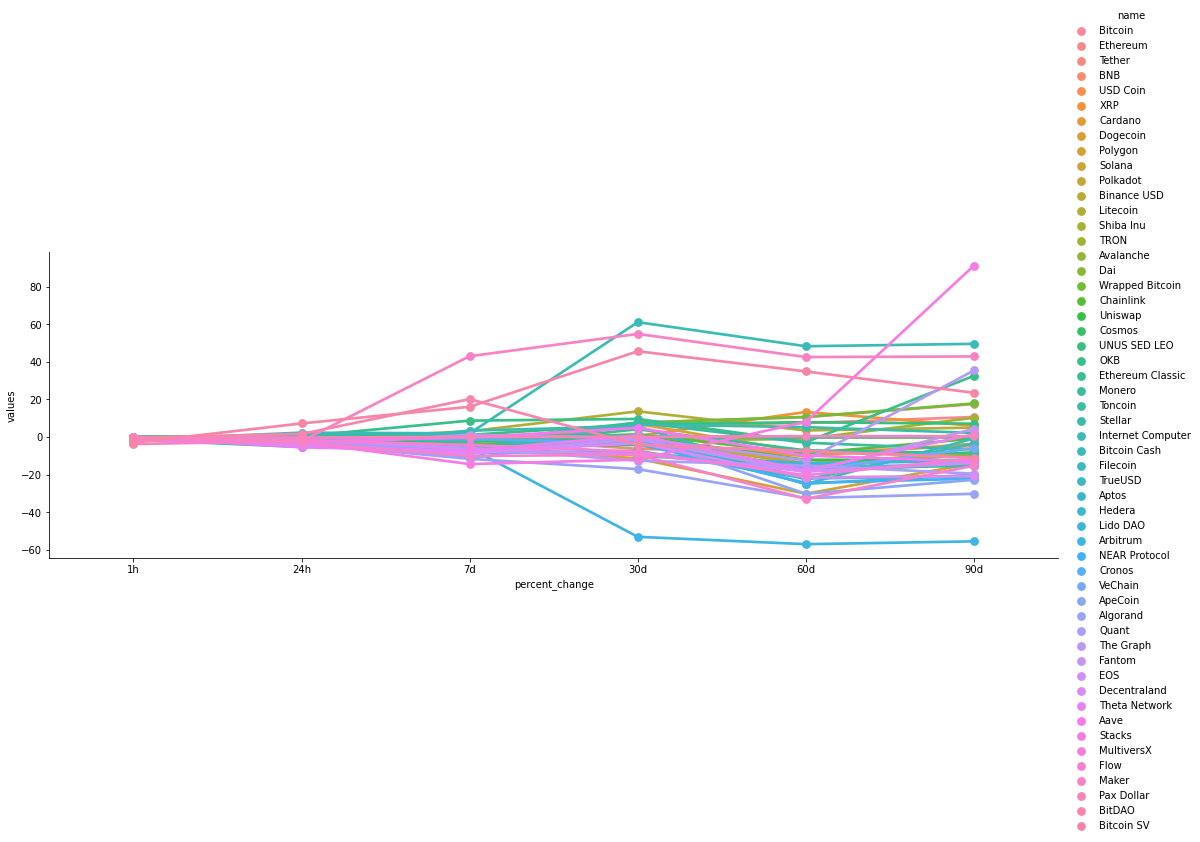

In [22]:
#visualisation

import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize = (80,5)) does not work for higher level plots like catplot, relplot. use it for box plot
sns.catplot(x='percent_change',y='values',hue='name',data=df6,kind = "point",height = 5 ,aspect = 3)

In [23]:
df7 = df2[['name','quote.USD.price','timestamp']]
df7 = df7.query("name in ['Bitcoin','Ethereum']")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,28025.63186,2023-04-21 09:40:31.449539
1,Ethereum,1919.79527,2023-04-21 09:40:31.449539
50,Bitcoin,28025.63186,2023-04-21 09:40:37.266976
51,Ethereum,1919.79527,2023-04-21 09:40:37.266976
100,Bitcoin,28025.63186,2023-04-21 09:40:43.043524
...,...,...,...
351,Ethereum,1897.48389,2023-07-06 12:44:59.019250
400,Bitcoin,30598.49042,2023-07-06 12:45:05.250298
401,Ethereum,1897.48389,2023-07-06 12:45:05.250298
450,Bitcoin,30612.32300,2023-07-06 12:45:10.642628


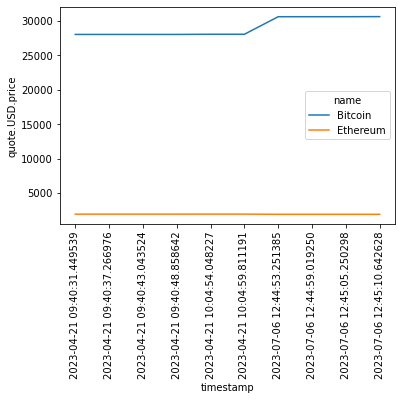

In [24]:
plot = sns.lineplot(x='timestamp',y='quote.USD.price',hue='name',data = df7)
for i in plot.get_xticklabels():
    i.set_rotation(90)